In [216]:
# ok python 3.10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import *
from decimal import Decimal

In [217]:
df = pd.read_csv('php2jDIhh.csv')
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [218]:
df = df.sample(frac=1)
df = df.head(200)
df = df.reset_index().drop(columns=['index'])

In [219]:
set(df['buying'].values)

{'high', 'low', 'med', 'vhigh'}

In [220]:
set(df['maint'].values)

{'high', 'low', 'med', 'vhigh'}

In [221]:
set(df['persons'].values)

{'2', '4', 'more'}

In [222]:
set(df['doors'].values)

{'2', '3', '4', '5more'}

In [223]:
set(df['lug_boot'].values)

{'big', 'med', 'small'}

In [224]:
set(df['safety'].values)

{'high', 'low', 'med'}

In [225]:
set(df['class'].values)

{'acc', 'good', 'unacc', 'vgood'}

In [226]:
for name in ['buying', 'maint', 'doors', 'persons', 'safety', 'lug_boot']:
    df[name] = df[name].map(lambda s: {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3,
     'small' : 0, 'big': 2, '5more': 5, 'more': 6, '2': 2, '3': 3, '4': 4}[s])

classes = df['class'].copy()

df["class0"] = df['class'].map(lambda s: {'acc': 1, 'good': 0, 'unacc': 0, 'vgood': 0}[s])
df["class1"] = df['class'].map(lambda s: {'acc': 0, 'good': 1, 'unacc': 0, 'vgood': 0}[s])
df["class2"] = df['class'].map(lambda s: {'acc': 0, 'good': 0, 'unacc': 1, 'vgood': 0}[s])
df["class3"] = df['class'].map(lambda s: {'acc': 0, 'good': 0, 'unacc': 0, 'vgood': 1}[s])
df = df.drop(columns = ['class'])

df

,buying,maint,doors,persons,lug_boot,safety,class0,class1,class2,class3
0,2,2,5,2,0,2,0,0,1,0
1,1,0,5,6,1,0,0,0,1,0
2,3,1,2,2,2,1,0,0,1,0
3,0,2,5,4,1,1,1,0,0,0
4,0,2,5,6,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
195,3,0,3,2,0,1,0,0,1,0
196,0,0,2,4,1,2,0,1,0,0
197,2,3,3,2,0,1,0,0,1,0
198,1,2,4,4,2,0,0,0,1,0


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    200 non-null    int64
 1   maint     200 non-null    int64
 2   doors     200 non-null    int64
 3   persons   200 non-null    int64
 4   lug_boot  200 non-null    int64
 5   safety    200 non-null    int64
 6   class0    200 non-null    int64
 7   class1    200 non-null    int64
 8   class2    200 non-null    int64
 9   class3    200 non-null    int64
dtypes: int64(10)
memory usage: 15.8 KB


In [228]:
count_classes = [0,0,0,0]
for i in range(len(df)):
    for j in range(4):
        if df.iloc[i][f"class{j}"] == 1:
            count_classes[j] += 1
print(count_classes)

[46, 12, 134, 8]


In [229]:
def p_root(value, root):
     
    root_value = 1 / float(root)
    return round (Decimal(value) **
             Decimal(root_value), 3)
 
def minkowski_distance(x, y, p_value):
     
    # pass the p_root function to calculate
    # all the value of vector parallelly
    return (p_root(sum(pow(abs(a-b), p_value)
            for a, b in zip(x, y)), p_value))

def euclidian_dist(x, y):
    return minkowski_distance(x, y, 2)

def manhattan_dist(x, y):
    return minkowski_distance(x, y, 1)

def chebyshev_dist(x, y):
    res = 0
    for i in range(len(x)):
        res = max(res, abs(x[i] - y[i]))
    return res

def uniform(u):
    if abs(u) > 1:
        return 0.
    return 0.5

def triangular(u):
    if abs(u) > 1:
        return 0.
    return 1 - abs(u)

def epanechnikov(u):
    if abs(u) > 1:
        return 0.
    return 3 / 4 * (1 - u ** 2)

def quartic(u): 
    if abs(u) > 1:
        return 0.
    return 15 / 16 * ((1 - u ** 2) ** 2)

dist_funcs = [(manhattan_dist, 'manhattan'), (euclidian_dist, 'euclidian'), (chebyshev_dist, 'chebyshev_dist')]
k_funcs = [(triangular, 'triangular'), (uniform, 'uniform'), (epanechnikov, 'epanechnikov'), (quartic, 'quartic')]


In [230]:
Y = df[['class0', 'class1', 'class2', 'class3']]
X = df.drop(Y.axes[1].tolist(), axis = 1)
Y = Y.to_numpy()
# X = X.to_numpy()

In [231]:
def f_score(kernel, type, param):
    matrix = np.zeros((4,4))
    for i in range(len(X)):
        if type == 'n':
            answ = kNN_neighbours(i, param)
        else:
            answ = kNN_fixed(i, param, kernel)
        max_val = 0
        predict = 0
        true_answ = 0
        for j in range(4):
            if (answ[j] > max_val):
                predict = j
                max_val = answ[j]
            if (Y[i][j] == 1):
                true_answ = j
        matrix[true_answ][predict] += 1
    precision = sum([matrix[i][i] / max(0.5, sum(matrix[i])) for i in range(4)]) / 4
    recall = sum([matrix[i][i] / max(0.5, sum(matrix[:,i])) for i in range(4)]) / 4
    if (precision + recall == 0):
        return 0
    return 2 * precision * recall / (precision + recall)


def kNN_neighbours(u_ind, k):
    distances = []
    for i in range(len(X)):
        distances.append(distance[u_ind][i])
    X['distances'] = distances
    
    X_sorted = X.sort_values(by=['distances'])
    first_k_ind = X_sorted.head(k).index
    X.drop(columns=['distances'], inplace=True)

    summ = np.zeros(len(Y[0]))
    for i in first_k_ind[1:]:
        summ += Y[i]
    return summ


def kNN_fixed(u_ind, h, kernel):
    summ = np.zeros(len(Y[0]))
    if h != 0:
        for i in range(len(X)):
            if i != u_ind:
                summ += kernel(distance[u_ind][i] / h) * Y[i]
    return summ

In [232]:
best_f = 0

results = {}  
best = 'nothing'
best_k = triangular
best_d= manhattan_dist
best_t = 0

for (dist_func, dist_name) in dist_funcs:
    r = 0
    distance = np.zeros((len(X), len(X)))
    for i in range(len(X)):
        for j in range(i + 1, len(X)):
            distance[i][j] = dist_func(X.iloc[i], X.iloc[j])
            distance[j][i] = distance[i][j]
            r = max(r, distance[i][j])
    for (k_func, k_name) in k_funcs:
        for h in np.arange(r / np.sqrt(len(df)), r + r / np.sqrt(len(df)), r / np.sqrt(len(df))):
            cur_f_score = f_score(k_func, 'f', h)
            name = dist_name + " " + k_name + " fixed " + str(h)
            print(name + " " + str(cur_f_score))
            if cur_f_score > best_f:
                best_f = cur_f_score
                best = name
                best_k = k_func
                best_d = dist_func
                best_t = 'f'
            
        for k in np.arange(1, len(df) ** 0.5):
            cur_f_score = f_score(k_func, 'n', int(round(k)))
            name = dist_name + " " + k_name + " fixed " + str(h)
            print(name + " " + str(cur_f_score))
            if cur_f_score > best_f:
                best_f = cur_f_score
                best = name
                best_k = k_func
                best_d = dist_func
                best_t = 'n'

print('best')
print(best)



manhattan triangular fixed 1.0606601717798212 0.5538949851775528
manhattan triangular fixed 2.1213203435596424 0.6310388667887897
manhattan triangular fixed 3.181980515339464 0.5794921327334964
manhattan triangular fixed 4.242640687119285 0.515364011964401
manhattan triangular fixed 5.303300858899106 0.3754519281658515
manhattan triangular fixed 6.363961030678927 0.35662325792493016
manhattan triangular fixed 7.424621202458749 0.33206531135796374
manhattan triangular fixed 8.48528137423857 0.27322819612036053
manhattan triangular fixed 9.54594154601839 0.20120120120120122
manhattan triangular fixed 10.606601717798211 0.2005988023952096
manhattan triangular fixed 11.667261889578032 0.2005988023952096
manhattan triangular fixed 12.727922061357853 0.2005988023952096
manhattan triangular fixed 13.788582233137676 0.2005988023952096
manhattan triangular fixed 14.849242404917497 0.2005988023952096
manhattan triangular fixed 15.909902576697318 0.2005988023952096
manhattan triangular fixed 15.9

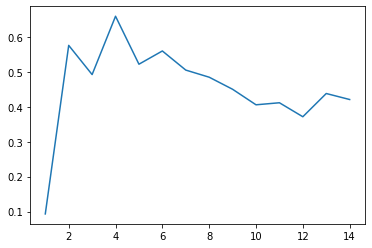

In [233]:
dist_func = best_d
k_func = best_k
distance = np.zeros((len(X), len(X)))

y = []
h_list = []


for i in range(len(X)):
    for j in range(i + 1, len(X)):
        distance[i][j] = dist_func(X.iloc[i], X.iloc[j])
        distance[j][i] = distance[i][j]
        r = max(r, distance[i][j])
if best_t == 'f':
    for h in np.arange(r / np.sqrt(len(df)), r + r / np.sqrt(len(df)), r / np.sqrt(len(df))):
        cur_f_score = f_score(k_func, 'f', h)
        y.append(cur_f_score)
        h_list.append(h)
else:
    for k in np.arange(1, len(df) ** 0.5):
        cur_f_score = f_score(k_func, 'n', int(round(k)))
        y.append(cur_f_score)
        h_list.append(k)

plt.plot(h_list, y, '-')
plt.show()
